## Pandas

Python's data structures (lists, dictionaries, etc.) are suitable for many purposes, but complex calculations repeated over and over again will often be slow in Python. *Numpy* was developed to create structures of data (called arrays) that are much faster in mathematical operations, in large part because the data types of all the elements in an array will be the same type. These numbers often lack the context to make the content meaningful, though. *Pandas* was developed on top of numpy to create data structures that would facilitate rapid calculation of numerical data while preserving the context that allows for the selection and manipulation of that data.

Pandas is not included by default in Python, but can be installed and used like any other module in Python. In the documentation, pandas is usually abbreviated as pd in the import statement.

In [4]:
import pandas as pd

### Series

The fundamental one-dimensional unit of pandas data is the *Series*. A series will have values that are all the same data type, and will also have index values associated with the data values. The index defaults to a series of integers (0,1,2...), but alternate values can be provided.

In [36]:
numbers = pd.Series([12.3,-4,8,2.7])
print(numbers)

0    12.3
1    -4.0
2     8.0
3     2.7
dtype: float64


In [37]:
ages = pd.Series([24,18,31,25],index=["Rick","George","Bob","Freddie"])
print(ages)

Rick       24
George     18
Bob        31
Freddie    25
dtype: int64


Series can be subsetted by index, by slice or by boolean series.

In [38]:
print(numbers[1])

-4.0


In [39]:
print(ages["Bob"])

31


In [40]:
print(ages[["George","Rick","George"]])

George    18
Rick      24
George    18
dtype: int64


In [41]:
print(ages["George":"Freddie"])

George     18
Bob        31
Freddie    25
dtype: int64


In [42]:
print(ages<30)

Rick        True
George      True
Bob        False
Freddie     True
dtype: bool


In [43]:
print(ages[ages>=25])

Bob        31
Freddie    25
dtype: int64


Series values can be used in mathematical operations. Each element of the series will be used in the series, without the need to set up an explicit loop. 

In [44]:
print(ages*0.3)

Rick       7.2
George     5.4
Bob        9.3
Freddie    7.5
dtype: float64


In [45]:
print(ages+10)

Rick       34
George     28
Bob        41
Freddie    35
dtype: int64


Series can be used in mathematical operations with other series. In this case, the operations are aligned by index value, meaning the operation will be performed for each index value in the pair of series. If the two series have different values in their indices, this will lead to NaN (not a number) values for every index value that is unique to one of the series. As such, it's helpful when performing mathematical operations with multiple series if they have a common index.

In [46]:
print(numbers**0.5)

0    3.507136
1         NaN
2    2.828427
3    1.643168
dtype: float64


In [47]:
print(numbers+ages)

0         NaN
1         NaN
2         NaN
3         NaN
Bob       NaN
Freddie   NaN
George    NaN
Rick      NaN
dtype: float64


### Data Frames

It will often be convenient, when performing calculations on different sets of numbers, to create sets of series that share a common index. The series will then have the same length, and mathematical operations between the series will be aligned appropriately. In pandas, this structure is called a *data frame*, and is the most common data structure used in data analyses in pandas. In addition to the common index, each series will also have a unique name and its own data type. This arrangement of data fits nicely into the tidy data paradigm, with each series representing a column of values corresponding to a particular variable (usually the name of the series), and each value in the index corresponding to a different observation or row.

While there is a function, *DataFrame*, that can be used to create a data frame from individual series, it's more common to compile data in another file and read it into Python. There are pandas functions for reading data from different files or other sources. Reading of data from text files is generally based on the CSV (comma-separated values) format, which can be generated either by hand or by several different programs.

The following code block reads data from a file that is *not* in CSV format, but still uses the read_csv function to read it. Several optional arguments are provided to indicate how the data is formatted.

In [5]:
gas = pd.read_csv("gasoline.data", delim_whitespace=True,
                 index_col=0, parse_dates=True)
print(gas)

            station        fuel    ppg     mpg
2013-09-16  7Eleven  Unleaded87  3.459  29.886
2013-09-26  7Eleven  Unleaded87  3.259  28.830
2013-10-02   Murphy  Unleaded87  3.339  29.795
2013-10-08    OnCue  Unleaded87  3.119  30.216
2013-10-13    OnCue  Unleaded87  3.259  28.615
2013-10-22    OnCue  Unleaded87  3.199  31.215
2013-10-28  7Eleven  Unleaded87  3.099  30.986
2013-11-05    OnCue  Unleaded87  2.919  30.017
2013-11-11  CircleK         E10  2.799  28.054
2013-11-17    Shell  Unleaded87  3.089  29.304
2013-11-21    OnCue         E10  2.739  26.818
2013-11-26  7Eleven  Unleaded87  3.049  28.559
2013-12-03    Shell         E10  2.699  26.456
2013-12-10    OnCue  Unleaded87  2.999  28.244
2013-12-16  7Eleven  Unleaded87  2.949  25.982
2013-12-28    OnCue  Unleaded87  3.099  26.691
2014-01-07    OnCue  Unleaded89  3.149  28.937
2014-01-14  7Eleven  Unleaded87  3.049  30.635
2014-01-20    OnCue  Unleaded87  3.099  27.399
2014-01-25  7Eleven         E10  2.989  27.255
2014-01-30   

/var/folders/x2/y68wcdvj0fxbg_p6vf1mhkn40000gr/T/ipykernel_77817/2889058362.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gas = pd.read_csv("gasoline.data", delim_whitespace=True,


### Subsetting

With a pandas data frame, it will often be helpful in performing analyses to be able to generate subsets of a collection of data for further processing. Pandas series and data frames are frequently treated like lists or dictionaries, in that the same subsetting notation (square brackets) is used for all of them. Series and data frames have additional syntax which allows for a more sophisticated selection of data.

Providing a data frame with the name of a series in the data frame will return the series.

In [50]:
print(gas["fuel"])

2013-09-16    Unleaded87
2013-09-26    Unleaded87
2013-10-02    Unleaded87
2013-10-08    Unleaded87
2013-10-13    Unleaded87
2013-10-22    Unleaded87
2013-10-28    Unleaded87
2013-11-05    Unleaded87
2013-11-11           E10
2013-11-17    Unleaded87
2013-11-21           E10
2013-11-26    Unleaded87
2013-12-03           E10
2013-12-10    Unleaded87
2013-12-16    Unleaded87
2013-12-28    Unleaded87
2014-01-07    Unleaded89
2014-01-14    Unleaded87
2014-01-20    Unleaded87
2014-01-25           E10
2014-01-30           E10
2014-02-04    Unleaded87
2014-02-09           E10
2014-02-14    Unleaded87
2014-02-20    Unleaded87
2014-02-25           E10
2014-03-01           E10
2014-03-08    Unleaded87
2014-03-14           E10
2014-03-26    Unleaded87
Name: fuel, dtype: object


Subsets of data can be selected by row identifiers (the index), column identifiers (names), and/or by boolean series for rows or columns. When using boolean series, rows or columns that have a True value in the series will be returned in the subset. Note that this code block uses the *loc* attribute to select the particular subset we are interested in. 

In [51]:
print(gas["mpg"]>27)

2013-09-16     True
2013-09-26     True
2013-10-02     True
2013-10-08     True
2013-10-13     True
2013-10-22     True
2013-10-28     True
2013-11-05     True
2013-11-11     True
2013-11-17     True
2013-11-21    False
2013-11-26     True
2013-12-03    False
2013-12-10     True
2013-12-16    False
2013-12-28    False
2014-01-07     True
2014-01-14     True
2014-01-20     True
2014-01-25     True
2014-01-30    False
2014-02-04    False
2014-02-09     True
2014-02-14     True
2014-02-20     True
2014-02-25     True
2014-03-01     True
2014-03-08     True
2014-03-14     True
2014-03-26     True
Name: mpg, dtype: bool


In [52]:
print(gas.loc[gas["mpg"]>27, "fuel":"mpg"])

                  fuel    ppg     mpg
2013-09-16  Unleaded87  3.459  29.886
2013-09-26  Unleaded87  3.259  28.830
2013-10-02  Unleaded87  3.339  29.795
2013-10-08  Unleaded87  3.119  30.216
2013-10-13  Unleaded87  3.259  28.615
2013-10-22  Unleaded87  3.199  31.215
2013-10-28  Unleaded87  3.099  30.986
2013-11-05  Unleaded87  2.919  30.017
2013-11-11         E10  2.799  28.054
2013-11-17  Unleaded87  3.089  29.304
2013-11-26  Unleaded87  3.049  28.559
2013-12-10  Unleaded87  2.999  28.244
2014-01-07  Unleaded89  3.149  28.937
2014-01-14  Unleaded87  3.049  30.635
2014-01-20  Unleaded87  3.099  27.399
2014-01-25         E10  2.989  27.255
2014-02-09         E10  2.979  27.917
2014-02-14  Unleaded87  3.299  30.699
2014-02-20  Unleaded87  3.099  28.696
2014-02-25         E10  3.199  29.571
2014-03-01         E10  3.259  27.780
2014-03-08  Unleaded87  3.479  29.013
2014-03-14         E10  3.279  27.651
2014-03-26  Unleaded87  3.389  29.765


### Grouping and Aggregating Data

Data in a "tidy" format, with categories listed in different columns, often need to be separated into categories in the process of analyzing the data. This can be accomplished fairly readily in pandas data frames with a *groupby* method, which takes as its main argument the column (or columns, if provided with a list) that contain the categories of the data. The method returns an object that contains the groups into which the data is collected. This grouped object can be used like a list in looping structures, or it can be analyzed with *aggregating* methods that perform simple calculations on the data.

The following code block groups the gasoline data by fuel and station, and calculates the mean of the price per gallon for every combination of fuel and station. To showcase another feature of pandas data frames, the resulting aggregated prices will also be displayed in a "wide" form, which is common for display of certain types of data. This analysis will be performed in steps, but the steps could be combined into a single line to avoid unnecessary creation of variable names.

In [53]:
pricegroups = gas[["fuel","station","ppg"]].groupby(["fuel","station"])
pricemean = pricegroups.mean()
print(pricemean)

                         ppg
fuel       station          
E10        7Eleven  3.134000
           CircleK  2.799000
           OnCue    2.979000
           Shell    2.979000
           Valero   2.979000
Unleaded87 7Eleven  3.140250
           Murphy   3.339000
           OnCue    3.163444
           Shell    3.089000
           Valero   3.389000
Unleaded89 OnCue    3.149000


In [54]:
print(pricemean.unstack())

                ppg                                       
station     7Eleven CircleK Murphy     OnCue  Shell Valero
fuel                                                      
E10         3.13400   2.799    NaN  2.979000  2.979  2.979
Unleaded87  3.14025     NaN  3.339  3.163444  3.089  3.389
Unleaded89      NaN     NaN    NaN  3.149000    NaN    NaN


In [55]:
mpggroups = gas[["fuel","station","mpg"]].groupby(["fuel","station"])
mpgmeans = mpggroups.mean()
print(mpgmeans)

                          mpg
fuel       station           
E10        7Eleven  27.453000
           CircleK  28.054000
           OnCue    27.776000
           Shell    27.118000
           Valero   27.917000
Unleaded87 7Eleven  28.723375
           Murphy   29.795000
           OnCue    29.123222
           Shell    29.304000
           Valero   29.765000
Unleaded89 OnCue    28.937000


## Statistical Analysis

Pandas data frames are classes with methods for collecting rudimentary analyses of data, such as finding averages, sums or extreme values within the collection of data. To perform more rigorous statistical analyses, though, other Python modules can be used. The *statsmodels* module facilitates statistical analysis of data assembled in pandas data frames. The module provides several functions for doing different
types of data analysis.

In [3]:
import statsmodels as sm

In [4]:
import statsmodels.formula.api as smf

In [5]:
from scipy import stats

In [6]:
stats.ttest_ind(gas["ppg"][gas["fuel"]=="Unleaded87"],
            gas["ppg"][gas["fuel"]=="E10"])

TtestResult(statistic=np.float64(2.4538705315908325), pvalue=np.float64(0.020869556705461444), df=np.float64(27.0))

In [9]:
stationsmodel = smf.ols('ppg~station', data=gas)
stationlm = stationsmodel.fit()
print(stationlm.summary())

                            OLS Regression Results                            
Dep. Variable:                    ppg   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.073
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.400
Time:                        13:25:25   Log-Likelihood:                 10.487
No. Observations:                  30   AIC:                            -8.974
Df Residuals:                      24   BIC:                           -0.5667
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.1390      0

## Visualization of Data

Several Python modules have been developed to produce plots of numerical data. Pandas is designed to work particularly well with matplotlib, which is part of the same project that developed numpy, on which Pandas is based. 

In [6]:
from matplotlib import pyplot as plt

Pandas series and data frames include methods for plotting data. By default, they will use matplotlib for the functions required for creating plots.

Plotting a Series will plot the values in the series as a function of the index values.

<Axes: >

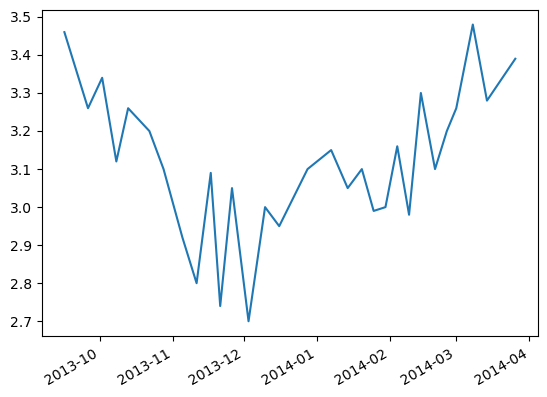

In [7]:
gas["ppg"].plot()

Pandas data frames also have a plot method associated with them.

<Axes: >

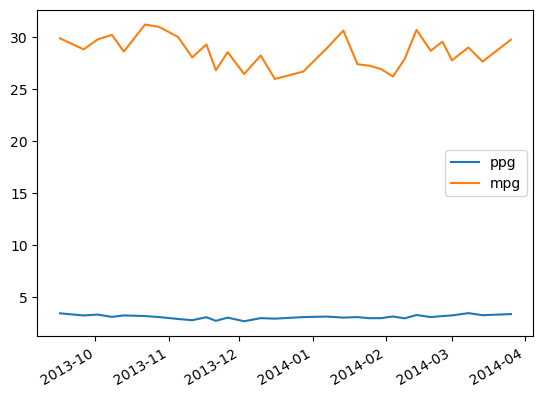

In [8]:
gas.plot()

Plots can be created by specifying the x and y values by column title.

<Axes: xlabel='ppg', ylabel='mpg'>

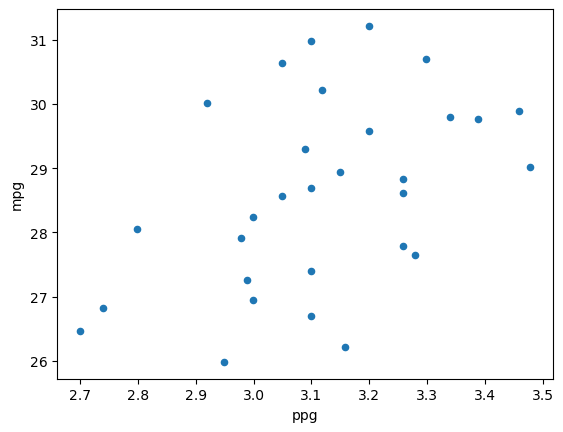

In [9]:
gas.plot(x="ppg", y="mpg", kind="scatter")

Creating a program will allow you to manage plotting while leveraging other aspects of data management in Python

<Axes: title={'center': 'ppg'}, xlabel='fuel'>

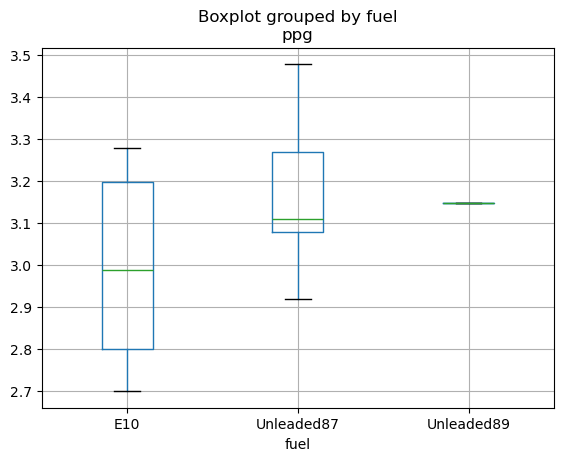

In [10]:
gas.boxplot(column="ppg", by="fuel")

## Seaborn

It's possible to create fairly sophisticated plots with Matplotlib, but this generally requires quite a bit of code to accomplish. Other Python modules have been developed to create more sophisticated plots with a smaller amount of code. Seaborn is a module that defines several functions for generating plots with Matplotlib, while specifying a relatively few parameters.

In [11]:
import seaborn as sns

<Axes: xlabel='ppg', ylabel='mpg'>

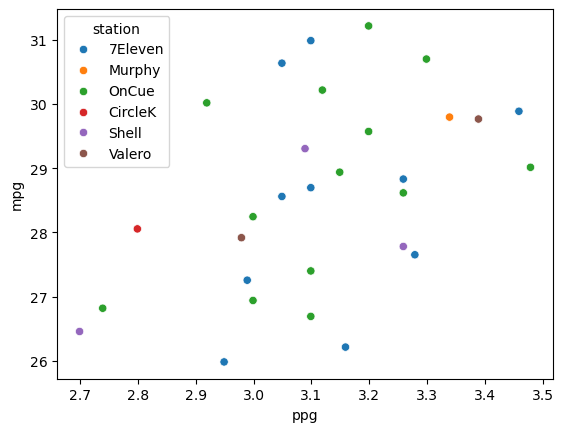

In [12]:
sns.scatterplot(x="ppg",y="mpg",hue="station",data=gas)